## Импорт библиотек

In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

## №1 Поиск пропусков

In [6]:
print(os.getcwd())

c:\My_Code\ETL_Geekbrains\seminar_2


In [12]:
df = pd.read_csv('row_data/s2_data.csv')

print(df.shape)
print(df.dtypes)

(21525, 12)
children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object


In [13]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [16]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(f'№ колонок которые имеют числовые значения: \n', numeric_cols, '\n')

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(f'№ колонок которые имеют нечисловые значения: \n', numeric_cols)

№ колонок которые имеют числовые значения: 
 ['children' 'days_employed' 'dob_years' 'education_id' 'family_status_id'
 'debt' 'total_income'] 

№ колонок которые имеют нечисловые значения: 
 ['children' 'days_employed' 'dob_years' 'education_id' 'family_status_id'
 'debt' 'total_income']


In [18]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

<Axes: >

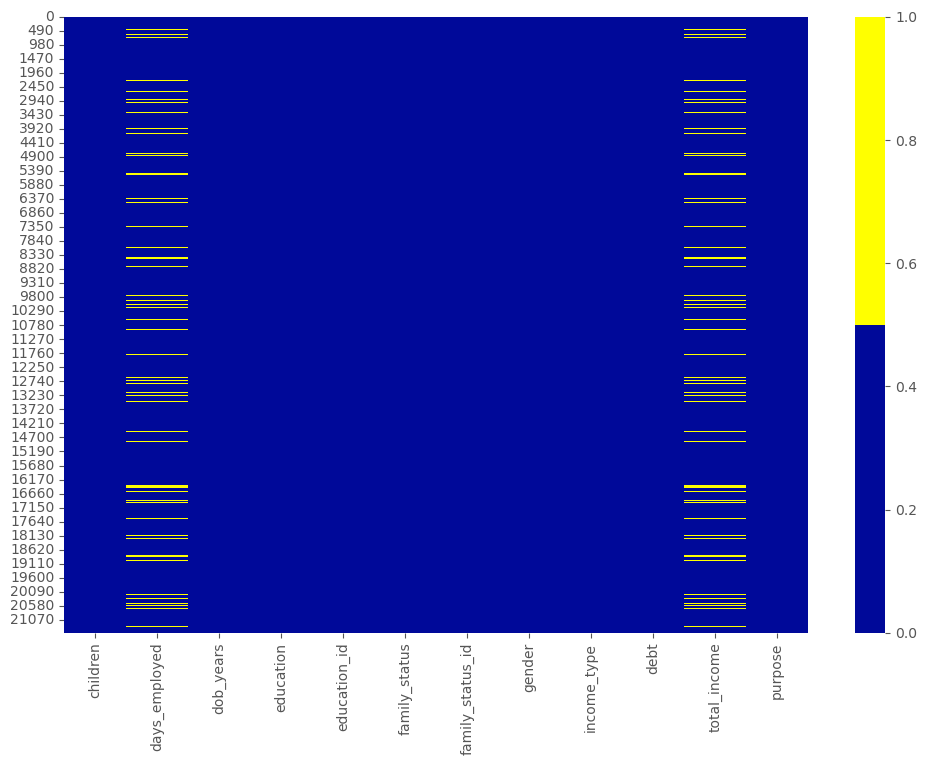

In [19]:
cols = df.columns[:]
colours = ['#000999', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [20]:
for col in df.columns:
    missing_valurs = np.mean(df[col].isnull())
    print(f'{col} - {round(missing_valurs*100)}')


children - 0
days_employed - 10
dob_years - 0
education - 0
education_id - 0
family_status - 0
family_status_id - 0
gender - 0
income_type - 0
debt - 0
total_income - 10
purpose - 0


## №2 Удаление дубликатов

In [28]:
# Приводим в колонке пол все данные в большой регистр
df['gender'] = df['gender'].str.upper()

# Приводим остальные строковые данные к маленькому регистру
character_columns = ['education', 'family_status', 'income_type', 'purpose']
for col in character_columns:
    df[col] = df[col].str.lower()

In [29]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [31]:
print(df.shape)
print(f'Количество абсолютных дубликатов: {df.duplicated().sum()}')

# Удаление абсолютных дубликатов
df = df.drop_duplicates().reset_index(drop=True)
print(df.shape)

(21525, 12)
Количество абсолютных дубликатов: 71
(21454, 12)


## №3 Добавление новое колонки

In [32]:
# Просмотрим какие события отмечены в таблице
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [34]:
# Созадим функцию для замены бракованных рукописных значений на единые стнадартные
def categorize_purpose(purpose):
    if 'авто' in purpose:
        return 'операции с автомобилем'
    if 'недвиж' in purpose or 'жиль' in purpose:
        return 'операции с недвижимостью'
    if 'свад' in purpose:
        return 'проведение свадьбы'
    if 'образов' in purpose:
        return 'получение образования'

print(categorize_purpose('покупка жилья')) 
print(categorize_purpose('свад')) 

операции с недвижимостью
проведение свадьбы


In [36]:
# Функция apply() в pandas используется для применения функции к каждому столбцу в DataFrame. 
df['purpose_category'] = df['purpose'].apply(categorize_purpose)
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,операции с недвижимостью
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,операции с автомобилем
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,операции с недвижимостью
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем,операции с недвижимостью
21450,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем,операции с автомобилем
21451,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость,операции с недвижимостью
21452,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля,операции с автомобилем


In [37]:
unique_values_count = df['purpose_category'].value_counts()
print(unique_values_count)

purpose_category
операции с недвижимостью    10811
операции с автомобилем       4306
получение образования        4013
проведение свадьбы           2324
Name: count, dtype: int64
